<a href="https://colab.research.google.com/github/Jadhav0702Gauri/Investigating-the-FBI-Gun-Dataset/blob/main/Investigating_the_FBI_Gun_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Investigating the FBI Gun Dataset**

####-  *Gauri Jadhav*

## Table of Contents
- [Introduction](#scrollTo=1ZIKxY0RL2b8)

- [Data Wrangling](#scrollTo=5XzITnPk250Q)

- [Exploratory Data Analysis](#scrollTo=r2gtRMUp4OGL)

- [Conclusion:](#scrollTo=GxBWgfgtnFrC)





## **Introduction**
> The dataset used in this notebook is the FBI Gun Datasets since 1998 till 2017, a number of background checks from FBI upon any gun purchases covering the  capital of the United States and their Territories.                    
The FBI Gun data inclues a range of different background check types, to name a few, 'permit', 'permit_recheck', 'handgun', 'long_gun', 'multiple'(purchasing more than one gun per background check). For each month, each state, there's a data point consisting all the above mentioned variables.

In [6]:
#import libraries
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb

# Goal:
**In this dataset I would like to explore the relationship between diffrent gun background checks and other transactions such as sale, carry permits, ownership and so on.**


# Questions:
[Research Question 1 :](#scrollTo=_FFJrz-d-LXF) What is overall trend of background check by Gun Types and sales.

[Research Question 2 :](#scrollTo=Lu-23i1ykHMM) What is the variation in firearm ownership, considering the highest and lowest number of Gun types in different states, and what is the average number of guns issued per state?

[Research Question 3 :](#scrollTo=5lSxO4LWHlsh) What is the trend of gun permits over the years, and is there a correlation between different types of gun permits?

#***Data Wrangling***

## Gather

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Data/gun_data.csv'

In [4]:
dff = pd.read_csv(path)
print(dff.shape)
dff.sample()

(12485, 27)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
992,2016-03,Arizona,8078.0,1628.0,14387.0,7907.0,883.0,614,0.0,3.0,...,0.0,NaN,NaN,15.0,9.0,0.0,1.0,1.0,0.0,35795


## Assess

In [5]:
dff.info() # gives information of data types, non-null counts, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [7]:
dff.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


##Clean

In [8]:
print(dff.shape)
dff.drop_duplicates(inplace = True)
print(dff.shape)

(12485, 27)
(12485, 27)


 The result above shows that there are no duplicate rows in the DataFrame. All rows are unique.

<Axes: >

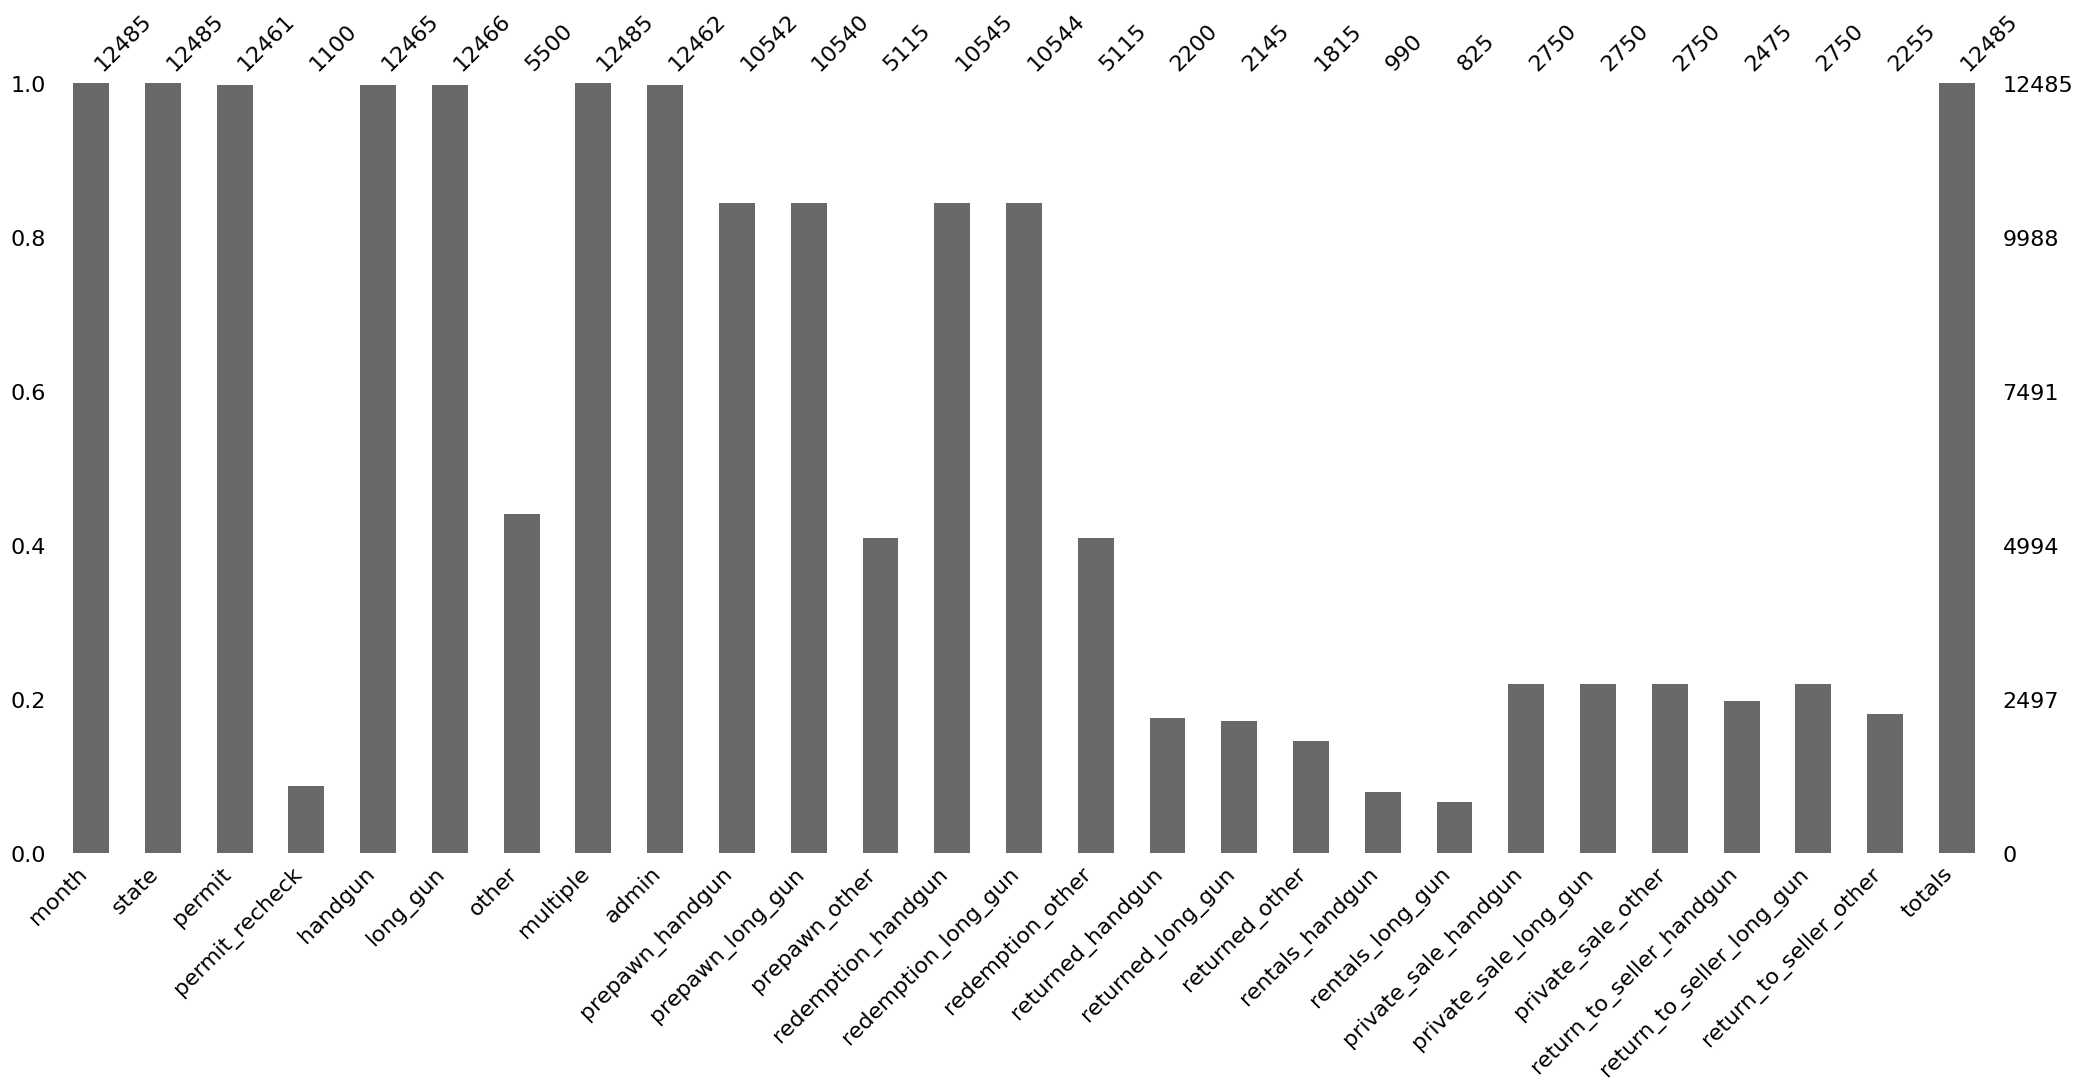

In [10]:
msno.bar(dff)

Visualizing Missing Values in the dataframe,
it shows many missing values in each.

In [11]:
dff.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

##The result above shows many missing data
To fix this issue I will impute missing values with 0 in the DataFrame


In [12]:
# instead of drop null value ,I'll impute missing values with 0.
dff.fillna(0, inplace=True)

<Axes: >

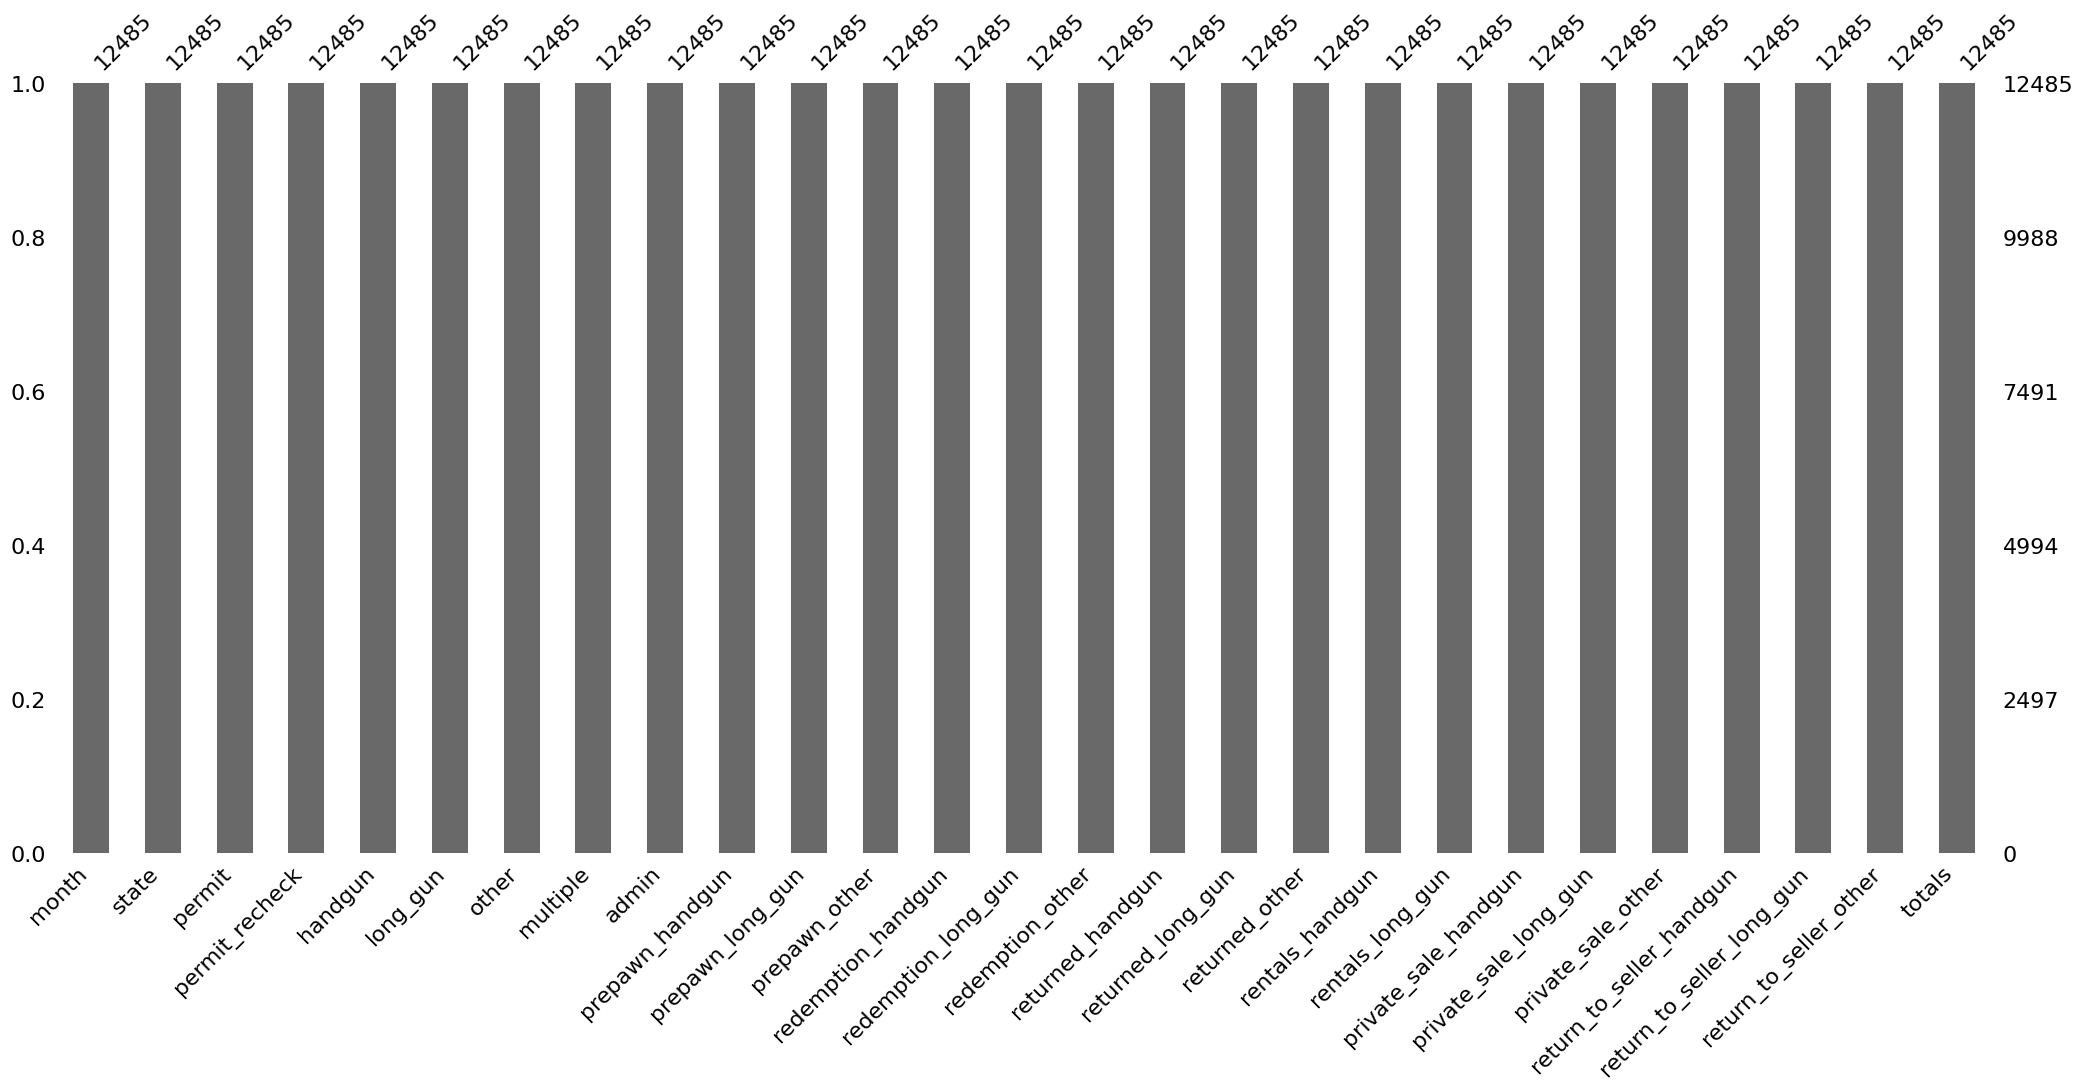

In [13]:
msno.bar(dff)

It shows many missing values have been filled .

In [ ]:
dff.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

The result above shows that we deal with all missing data

In [ ]:
dff.sample()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
4486,2010-12,New Hampshire,2432.0,0.0,2809.0,2747.0,15.0,7,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8022


In [ ]:
dff.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [ ]:
# making a copy of dataframe before cleaning
df = dff.copy()

### Create a copy of original dataframe:
So that we can analyse the dataframe without changing the original dataset and also to compare the difference later.

In [ ]:
print(df.shape)
df.head(1)

(12485, 27)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [ ]:
df['month'].value_counts()

2017-09    55
2003-07    55
2005-09    55
2005-08    55
2005-07    55
           ..
2011-02    55
2011-01    55
2010-12    55
2010-11    55
1998-11    55
Name: month, Length: 227, dtype: int64

In [ ]:
df['state'].value_counts()

Alabama                 227
Puerto Rico             227
Nevada                  227
New Hampshire           227
New Jersey              227
New Mexico              227
New York                227
North Carolina          227
North Dakota            227
Ohio                    227
Oklahoma                227
Oregon                  227
Pennsylvania            227
Rhode Island            227
Montana                 227
South Carolina          227
South Dakota            227
Tennessee               227
Texas                   227
Utah                    227
Vermont                 227
Virgin Islands          227
Virginia                227
Washington              227
West Virginia           227
Wisconsin               227
Nebraska                227
Missouri                227
Alaska                  227
Idaho                   227
Arizona                 227
Arkansas                227
California              227
Colorado                227
Connecticut             227
Delaware            

## Quality
- `multiple` and `totals` have the wrong datatype ,instead of float.
- `month` have the wrong datatype ,instead of datetime.

#***Data Cleaning***

###Define
#### Convert the data types for multiple, totals, and month in df

###Code

In [ ]:
df['multiple'] = df['multiple'].astype(float)
df['totals'] = df['totals'].astype(float)
df['month'] = pd.to_datetime(df['month'])

###Test

In [ ]:
# Looking at the dataframe, see if the appropriate data type changes were made.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

#### Extract the year from the month column.

In [ ]:
df['year'] =df['month'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

#### Looks like the year column has the data type int, but I would like it to be datetime.

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   permit                     12485 non-null  float64       
 3   permit_recheck             12485 non-null  float64       
 4   handgun                    12485 non-null  float64       
 5   long_gun                   12485 non-null  float64       
 6   other                      12485 non-null  float64       
 7   multiple                   12485 non-null  float64       
 8   admin                      12485 non-null  float64       
 9   prepawn_handgun            12485 non-null  float64       
 10  prepawn_long_gun           12485 non-null  float64       
 11  prepawn_other              12485 non-null  float64       
 12  rede

In [ ]:
df['handgun_sales'] = df['handgun']
df['long_gun_sales'] = df['long_gun']
df['other_sales'] = df['other']

df['total_sales'] = df['handgun_sales'] + df['long_gun_sales'] + df['other_sales']
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,handgun_sales,long_gun_sales,other_sales,total_sales
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,...,3.0,0.0,0.0,3.0,32019.0,2017-01-01,5734.0,6320.0,221.0,12275.0
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,5.0,...,1.0,0.0,0.0,0.0,6303.0,2017-01-01,2320.0,2930.0,219.0,5469.0
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,13.0,...,2.0,0.0,0.0,0.0,28394.0,2017-01-01,11063.0,7946.0,920.0,19929.0
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,...,0.0,0.0,2.0,1.0,17747.0,2017-01-01,4347.0,6063.0,165.0,10575.0
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,123506.0,2017-01-01,37165.0,24581.0,2984.0,64730.0


#***Exploratory Data Analysis***

### *Research Question 1 : What is overall trend of background check by Gun Types and sales*

In [ ]:
gun_types_sale = ['handgun_sales', 'long_gun_sales', 'other_sales','multiple']
gun_with_highest_sales = df[gun_types_sale].sum().idxmax()
highest_sales_value = df[gun_types_sale].sum().max()

print("The gun type with the highest total sales is {} with a total of {} sales." .format(gun_with_highest_sales , highest_sales_value))

The gun type with the highest total sales is long_gun_sales with a total of 97370026.0 sales.


In [ ]:
gun_df_full_years = df.query('year >= "1998-11-01" & year <= "2017-09-01"')
gun_df_full_years.sample()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,handgun_sales,long_gun_sales,other_sales,total_sales
5202,2009-11-01,New Jersey,0.0,0.0,1999.0,2644.0,0.0,70.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4713.0,2009-01-01,1999.0,2644.0,0.0,4643.0


In [ ]:
total_checks_yearly = gun_df_full_years.groupby('year')['totals'].sum()
total_checks_yearly.head()

year
1999-01-01    9043747.0
2000-01-01    8427096.0
2001-01-01    8820045.0
2002-01-01    8367069.0
2003-01-01    8402244.0
Name: totals, dtype: float64

In [ ]:
total_checks_yearly.tail()

year
2013-01-01    20966704.0
2014-01-01    20860241.0
2015-01-01    23026288.0
2016-01-01    27425512.0
2017-01-01    17990528.0
Name: totals, dtype: float64

Text(0, 0.5, 'Background Checks (Millions)')

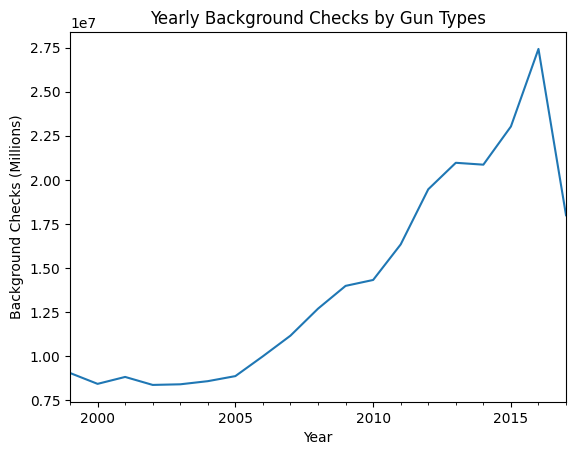

In [ ]:
total_checks_yearly.plot()

plt.title('Yearly Background Checks by Gun Types')
plt.xlabel('Year')
plt.ylabel( 'Background Checks (Millions)')

#### After Seeing the plot and the output we can conclude that every year there is an increase in gun, 2016 year has the highest gun types.

In [ ]:
total_checks_monthly = df.groupby('month')['totals'].sum()
total_checks_monthly.tail()

month
2017-05-01    1898840.0
2017-06-01    1888266.0
2017-07-01    1733308.0
2017-08-01    1896457.0
2017-09-01    1857226.0
Name: totals, dtype: float64

Text(0, 0.5, 'Background Checks (Millions)')

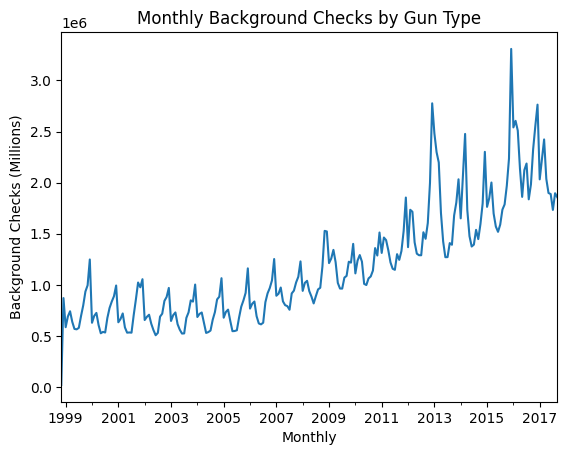

In [ ]:
total_checks_monthly.plot()

plt.title('Monthly Background Checks by Gun Type')
plt.xlabel('Monthly')
plt.ylabel( 'Background Checks (Millions)')

#### The graph above shows that the background checks have been increasing more from year 2006 till 2017, can conclude in 2016-12-01 has sum of guntypes = 2763115.0 which is the highest gun types.

In [ ]:
gun_checks_monthly = df.groupby('month')[['handgun', 'long_gun','other','multiple']].sum()
gun_checks_monthly.head()

,handgun,long_gun,other,multiple
month,,,,
1998-11-01,6859.0,11909.0,0.0,275.0
1998-12-01,213140.0,570882.0,0.0,8445.0
1999-01-01,184496.0,309915.0,0.0,7498.0
1999-02-01,232448.0,352411.0,0.0,9226.0
1999-03-01,241036.0,376775.0,0.0,9537.0


In [ ]:
gun_checks_monthly.value_counts()

handgun    long_gun  other    multiple
6859.0     11909.0   0.0      275.0       1
428058.0   497092.0  13486.0  17092.0     1
352352.0   400232.0  0.0      24723.0     1
355173.0   415474.0  0.0      24035.0     1
359660.0   642790.0  6079.0   19679.0     1
                                         ..
200776.0   261797.0  0.0      48052.0     1
200900.0   530688.0  0.0      9867.0      1
203352.0   255251.0  0.0      49991.0     1
204291.0   664194.0  0.0      8581.0      1
1201747.0  873335.0  52925.0  34059.0     1
Length: 227, dtype: int64

In [ ]:
gun_checks_yearly = gun_df_full_years.groupby('year')[['handgun', 'long_gun', 'other','multiple']].sum()
gun_checks_yearly.head()

,handgun,long_gun,other,multiple
year,,,,
1999-01-01,2536738.0,5217451.0,0.0,103743.0
2000-01-01,2191879.0,4779978.0,0.0,95777.0
2001-01-01,2167213.0,4943375.0,0.0,97132.0
2002-01-01,1845112.0,4409311.0,0.0,93069.0
2003-01-01,1851078.0,4383057.0,0.0,99236.0


Text(0, 0.5, 'Background Checks (Millions)')

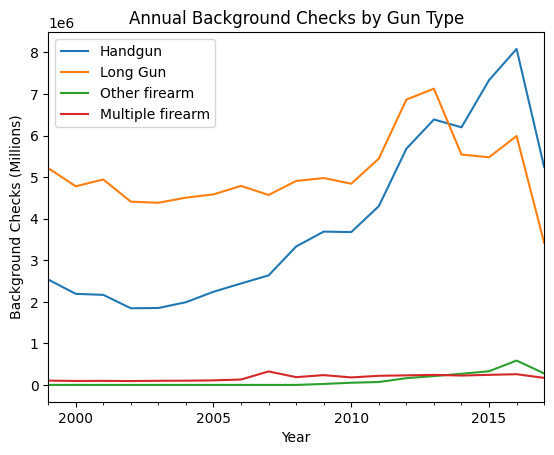

In [ ]:
gun_checks_yearly = gun_df_full_years.groupby('year')[['handgun', 'long_gun', 'other','multiple']].sum()

gun_checks_yearly.plot()
gun_checks_types = ['Handgun', 'Long Gun', 'Other firearm','Multiple firearm']
plt.legend(gun_checks_types)

plt.title('Annual Background Checks by Gun Type')
plt.xlabel('Year')
plt.ylabel('Background Checks (Millions)');

####Anually there is more long gun background checks in the data, handgun background checks increased at a faster rate and surpassed long guns in 2014. Except for a brief spike in 2012-2013, long gun checks only had a small increase. Other-gun and Multiple-gun checks stayed consistent over the time period.

Text(0, 0.5, 'Background Checks (Millions)')

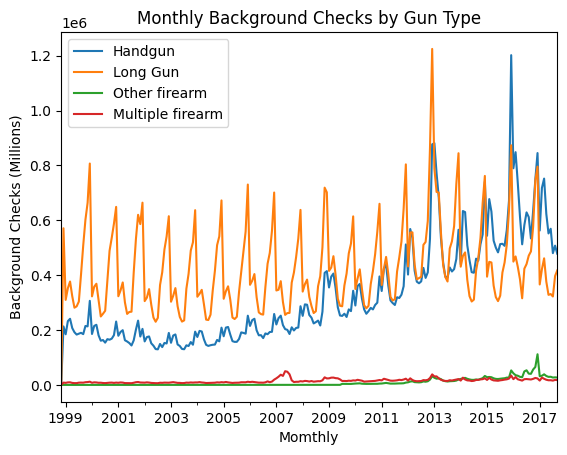

In [ ]:
gun_checks_monthly.plot()
gun_checks_types = ['Handgun', 'Long Gun', 'Other firearm', 'Multiple firearm']
plt.legend(gun_checks_types)

plt.title('Monthly Background Checks by Gun Type')
plt.xlabel('Momthly')
plt.ylabel( 'Background Checks (Millions)')


####`Handguns` and `long guns` show the same increase in trends within each year as mentioned. However, this trend is not as noticeable in the `other` and `multiple_guns`.

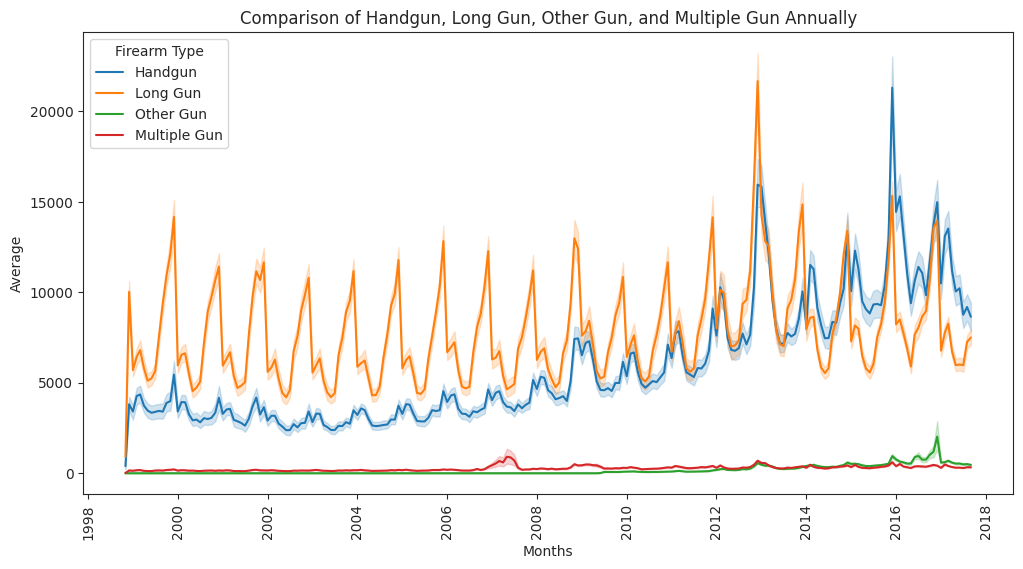

In [ ]:
hg_avg = df['handgun'].rolling(10).mean()
lg_avg = df['long_gun'].rolling(10).mean()
og_avg = df['other'].rolling(10).mean()
mg_avg = df['multiple'].rolling(10).mean()

plot_df = pd.DataFrame({'Month': df['month'], 'Handgun': hg_avg, 'Long Gun': lg_avg, 'Other Gun': og_avg, 'Multiple Gun': mg_avg})

plt.figure(figsize=(12, 6))
sb.lineplot(x='Month', y='value', hue='variable', data=pd.melt(plot_df, ['Month']))

plt.xlabel('Months')
plt.ylabel('Average')
plt.title('Comparison of Handgun, Long Gun, Other Gun, and Multiple Gun Annually')
plt.xticks(rotation=90)
plt.legend(title='Firearm Type')

plt.show()

####Similar to the average increase in `hand gun` annualy compared to the `long gun`, where as the `other firearm` and `multiple firearm` has not that much.

##Findings:

- Overall, there is a consistent **increase** in background checks from `2006` to `2017`.
- The **peak** in gun types occurred in December `2016`, with a sum of `2,763,115`.
- `Handgun` background checks **increased** rapidly, surpassing `long guns` in `2014`.
- `Long gun` checks experienced a **small increase**, with a noticeable spike in `2012-2013` and have the highest total sales, reaching `97,370,026` units.
- `Other-gun` and `Multiple-gun` checks remained relatively consistent over the years.
- `Handguns` and `long guns` exhibit similar **increasing trends annually**, while `other` and `multiple guns` show **less changes**.

**The trend indicates a consistent overall increase in firearm background checks from 2006 to 2017, with long guns having the highest total sales, a notable surge in 2016, and handguns surpassing long guns in 2014.**

### *Research Question 2 : What is the variation in firearm ownership, considering the highest and lowest number of Gun types in different states, and what is the average number of guns issued per state?*

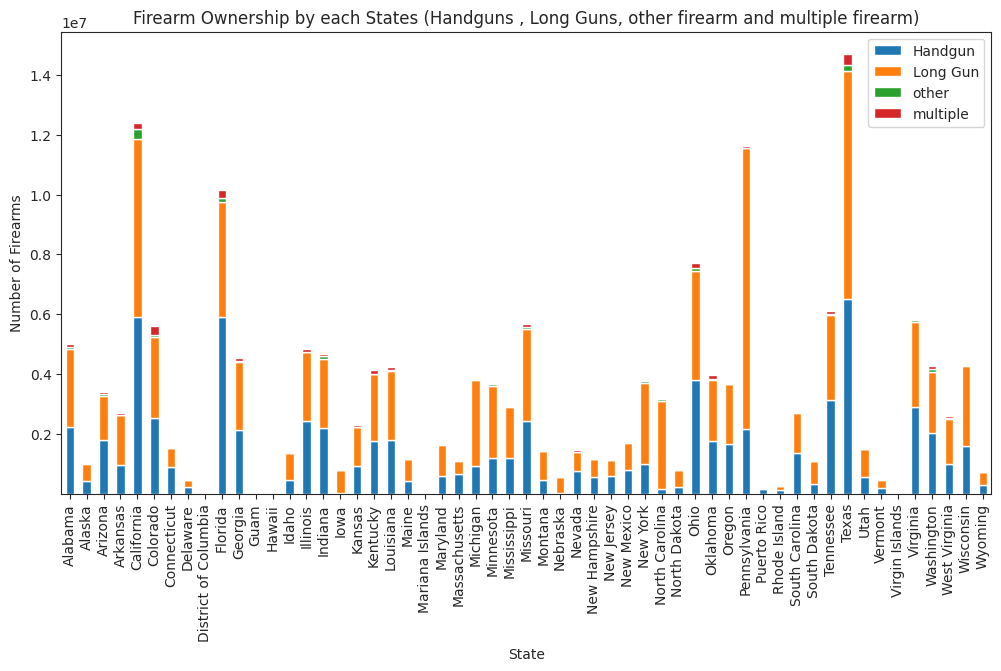

In [ ]:
state_firearm_ownership = df.groupby('state')[['handgun', 'long_gun', 'other','multiple']].sum()

state_firearm_ownership.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Firearm Ownership by each States (Handguns , Long Guns, other firearm and multiple firearm)')
plt.xlabel('State')
plt.ylabel('Number of Firearms')
plt.legend(['Handgun', 'Long Gun','other','multiple'])

plt.show()

Top 3 firearm ownership:
1. **Texas:**
   - Highest Handgun Sales: 5,910,880
   - Highest Long Gun Sales: 5,936,770
   - Highest Other Gun Sales: 342,635
   - Highest Multiple Gun Sales: 207,864
   - Dominates in total firearm sales, particularly handguns and long guns.

2. **California:**
   - Second-highest Handgun Sales: 5,909,952
   - Second-highest Long Gun Sales: 3,829,090
   - Second-highest Other Gun Sales: 153,326
   - Second-highest Multiple Gun Sales: 242,702
   - Significant overall firearm sales, particularly in handguns.

3. **Pennsylvania:**
   - Third-highest Handgun Sales: 6,493,832
   - Third-highest Long Gun Sales: 7,651,396
   - Third-highest Other Gun Sales: 193,465
   - Third-highest Multiple Gun Sales: 367,962
   - Consistently high across all firearm types, especially long guns.

In [ ]:
handgun_state = df.groupby('state')['handgun'].sum().idxmax()
long_gun_state = df.groupby('state')['long_gun'].sum().idxmax()
other_gun_state = df.groupby('state')['other'].sum().idxmax()
multiple_gun_state = df.groupby('state')['multiple'].sum().idxmax()

handgun_state_min = df.groupby('state')['handgun'].sum().idxmin()
long_gun_state_min = df.groupby('state')['long_gun'].sum().idxmin()
other_gun_state_min = df.groupby('state')['other'].sum().idxmin()
multiple_gun_state_min = df.groupby('state')['multiple'].sum().idxmin()

#print(f'The state with the highest number of handgun sale is: {handgun_state}')
#print(f'The state with the lowest number of handgun sale is: {handgun_state_min}')

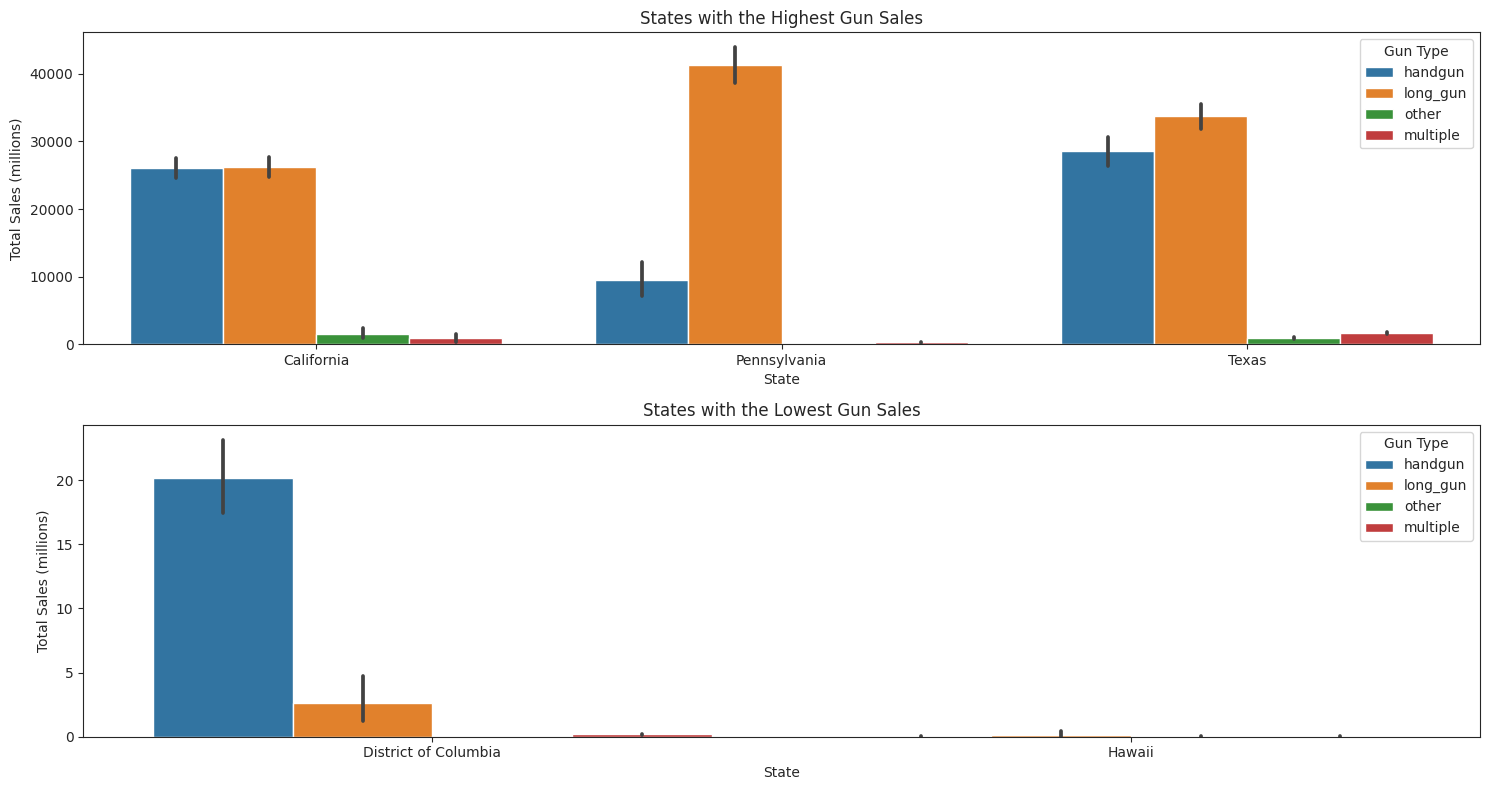

In [ ]:
plot_df_max = df[df['state'].isin([handgun_state, long_gun_state, other_gun_state, multiple_gun_state])]
plot_df_min = df[df['state'].isin([handgun_state_min, long_gun_state_min, other_gun_state_min, multiple_gun_state_min])]

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
sb.barplot(x='state', y='value', hue='variable', data=pd.melt(plot_df_max, id_vars=['state'], value_vars=['handgun', 'long_gun', 'other', 'multiple']))
plt.title('States with the Highest Gun Sales')
plt.ylabel('Total Sales (millions)')
plt.xlabel('State')
plt.legend(title='Gun Type')

plt.subplot(2, 1, 2)
sb.barplot(x='state', y='value', hue='variable', data=pd.melt(plot_df_min, id_vars=['state'], value_vars=['handgun', 'long_gun', 'other', 'multiple']))
plt.title('States with the Lowest Gun Sales')
plt.ylabel('Total Sales (millions)')
plt.xlabel('State')
plt.legend(title='Gun Type')

plt.tight_layout()
plt.show()

- Texas leading in both handgun and multiple gun sales, while Pennsylvania and California top the list for long guns and other guns, respectively.
- Conversely, Hawaii consistently appears among the states with the lowest gun sales across all categories, with the District of Columbia also having the lowest sales for other guns.

In [ ]:
state_average = df.groupby('state')['totals'].mean().sort_values(ascending=False)
print(state_average.head())

state
Kentucky        131112.044053
Texas            85617.559471
California       83762.392070
Illinois         68156.537445
Pennsylvania     57858.484581
Name: totals, dtype: float64


####The state Kentucky has the highest average number of gun issued, followed by Texas, California, Illinois, and Pennsylvania.

##Findings:
- **Texas** dominates total firearm sales, especially `handguns` and `long guns`, while **California** consistently ranks *high* across all `firearm types`.
- **Kentucky** has the *highest average* number of guns issued per state, followed by **Texas, California, Illinois,** and **Pennsylvania**.
- **Hawaii** consistently records the *lowest* gun sales, and the District of **Columbia** has the lowest sales for `other guns`.                      


***The trend suggests significant variations in firearm ownership among states, with California dominating sales, Texas consistently ranking high, and Kentucky leading in the average number of guns issued per state.***

###  *Research Question 3 : What is the trend of gun permits over the years, and  is there a correlation between different types of gun permits?*


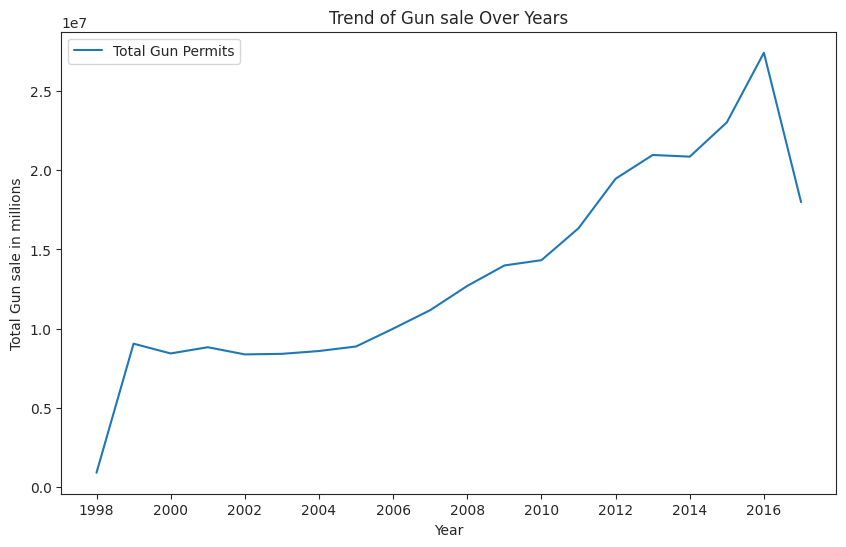

In [ ]:
year_totals = df.groupby('year')['totals'].sum()

plt.figure(figsize=(10,6))
plt.plot(year_totals.index, year_totals.values, '-')

plt.title('Trend of Gun sale Over Years')
plt.xlabel('Year')
plt.ylabel('Total Gun sale in millions')
plt.legend(['Total Gun Permits'])
plt.show()

#### There is a general upward trend in the total number of gun permits over years. This suggests that the number of gun permits issued has been increasing over the years. In 2016 is at the peak of total gun sale.

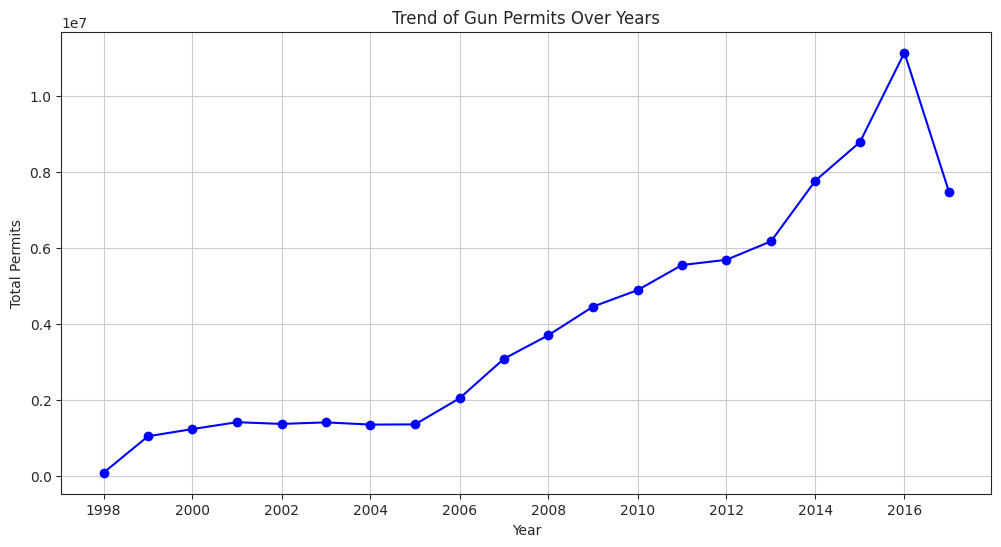

In [ ]:
#df['year'] = df['month'].dt.year
#df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

permit_by_year = df.groupby('year')['permit'].sum()

plt.figure(figsize=(12, 6))
plt.plot(permit_by_year.index, permit_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Trend of Gun Permits Over Years')
plt.xlabel('Year')
plt.ylabel('Total Permits')
plt.grid(True)
plt.show()

- The number of gun permits steadily increased from `1998` to `2016`.
- There is a peak in gun permits in `2016`, reaching `11,134,651`, which represents a substantial surge compared to previous years.
- In `2017`, there is a noticeable decrease in the number of permits, dropping to `7,469,845`.

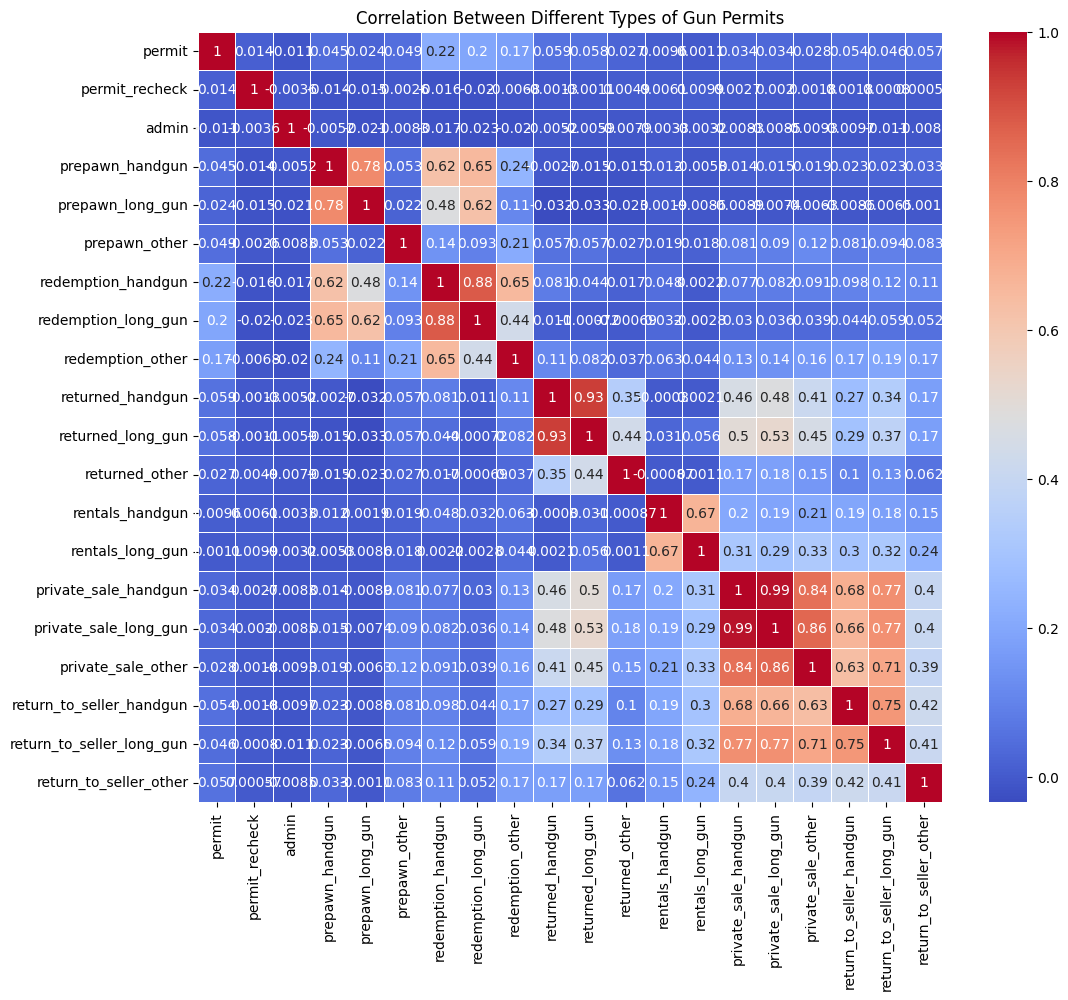

In [ ]:
permit_types = ['permit', 'permit_recheck', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
                'prepawn_other', 'redemption_handgun', 'redemption_long_gun', 'redemption_other',
                'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun',
                'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun',
                'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun',
                'return_to_seller_other']

permit_df = df[permit_types]

correlation_matrix = permit_df.corr()
#print(correlation_matrix)

plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Different Types of Gun Permits')
plt.show()

1. **Strong Correlations:**
   - There is a **strong positive correlation** between various permit types, especially between `permit` and `redemption_handgun` (0.217), `redemption_long_gun` (0.196), and `redemption_other` (0.173).
   - `returned_handgun` and `returned_long_gun` show a very high positive correlation of 0.933, indicating a strong association.

2. **Moderate Correlations:**
   - Some permit types have **moderate positive correlations**, such as `prepawn_handgun` and `prepawn_long_gun` (0.781), `redemption_handgun` and `redemption_long_gun` (0.883), and `private_sale_handgun` and `private_sale_long_gun` (0.987).
   - `private_sale_handgun` and `private_sale_long_gun` have a strong positive correlation of 0.987.

3. **Low Correlations:**
   - Some permit types have **Week correlations**, such as `admin` with `other permit`(0.0036) types.
   - `permit_recheck` has low correlations with most other permit types.

### Findings:                                 
- The gun permits indicates a general **increase** over the years, reaching a peak in `2016` at `11,134,651` permits, followed by a noticeable decline in `2017` to `7,469,845`.
- **Strong positive correlations** exist between various permit types, with notable associations, such as between `redemption_handgun` and `redemption_long_gun`, and `returned_handgun` and `returned_long_gun`.


###Gun permits exhibit an overall increasing trend over the years, peaking in 2016, followed by a decline in 2017, while strong positive correlations exist among different permit types, reflecting notable associations.

#**Conclusions:**
With the exploration performed above, we can answer the questions raised at the [begginning](#scrollTo=HX6WVgmvSzcX) of this notebook, with [limitation](#scrollTo=NnkibXR2-Q13) :

**Research Question 1 :**What is overall trend of background check by Gun Types and sales
>The overall trend of background checks by gun types and sales indicates a consistent increase from 2006 to 2017. Handguns surpassed long guns in 2014, with long guns having the highest total sales. Other and multiple gun checks remained relatively consistent.


**Research Question 2 :** What is the variation in firearm ownership, considering the highest and lowest numbers of handgun, long gun, other gun, and multiple gun sales in different states, and what is the average number of guns issued per state?
>Significant variations in firearm ownership exist among states, with Texas dominating total firearm sales, California consistently ranking high, and Kentucky leading in the average number of guns issued per state. Hawaii consistently records the lowest gun sales.

**Research Question 3 :**What is the trend of gun permits over the years, and is there a correlation between different types of gun permits?
>Gun permits show a general increase over the years, peaking in 2016 at 11,134,651 permits, followed by a decline in 2017 to 7,469,845. Strong positive correlations exist between various permit types, indicating notable associations.



#**Limitation:**
**The [conclusion](#scrollTo=GxBWgfgtnFrC) present above have some limitations**.
The conclusion we made about the ownweship  average number of guns issued per state does not account for population differences among states. A more nuanced analysis would consider per capita ownership rates. Interpretation of trends and correlations is based solely on available data, lacking some information on firearm-related activities that aren't captured in the dataset.
strong correlations exist between certain permit types, the analysis does not delve into the underlying reasons. Factors like changes in gun laws, societal perceptions, or other condition are not considered.
Due to the smaller dataset, our conclusion has limitations. Some of the conclusions are based on correlations, but since we know, correlation can't be always linked with causation. Further analysis is required in that cases.
